Import Pandas

In [0]:
import pandas as pd

Let's use iris from seaborn

In [0]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


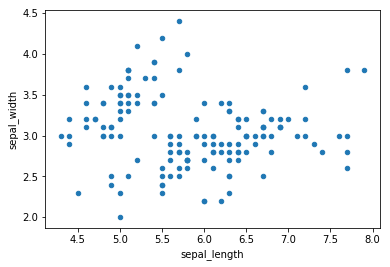

In [0]:
?pd.DataFrame.plot.scatter
df.plot.scatter(x='sepal_length', y='sepal_width')

Bar chart of sample type counts

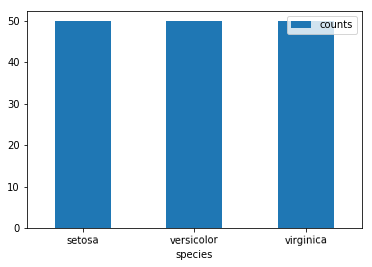

In [0]:
df = df.groupby(['species']).size().reset_index(name='counts')
df.plot.bar(x='species', y='counts', rot=1)  #rot=1 sets labels horizontal

# 🤔 Exercise 1: 

In a new Colab notebook, use `matplotlib` to create a scatterplot of  the `Seaborn iris` dataset showing `sepal lenght` vs. `sepal width`  where the dots are colored by spieces. 

Can you find a way to deal with overplotting?

You will need to look at the help:

```
?pd.DataFrame.plot.scatter
```

 and use colors in a list:

```
color_map = {'setosa': '#a6cee3', 'versicolor': '#1f78b4', 'virginica': '#b2df8a'}
colors = df.species.map(color_map)
```



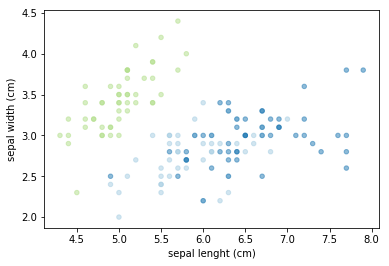

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')

#this needs colors...
#df.plot.scatter(x='sepal_length', y='sepal_width', c='')

df.species.unique()
#color_map = {'setosa': 'r', 'versicolor': 'b', 'virginica': 'y'}
#color_map = {'setosa': '#a6cee3', 'versicolor': '#1f78b4', 'virginica': '#b2df8a'}
color_map = {'setosa': '#a6cee380', 'versicolor': '#1f78b480', 'virginica': '#b2df8a80'}
#color_map = {'setosa': (178/256,223/256,138/256,128/256), 'versicolor': (166/256,206/256,227/256,128/256), 'virginica': (31/256,120/256,180/256,128/256) } #, ''}
colors = df.species.map(color_map)

df.plot.scatter(x='sepal_length', y='sepal_width', c=colors)
plt.xlabel('sepal lenght (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# 😖 Exercise 2: 

Can you see from the help why for the dataset `SMO-VOR-2015` Pandas scatter won't work? Can you make it work?

```
?pd.DataFrame.plot.scatter
```

Hint: use `.astype(int)` to convert a date to an integer.

Text(0.5, 1.0, 'Altitudes recorded at the SMO VRO for 2015')

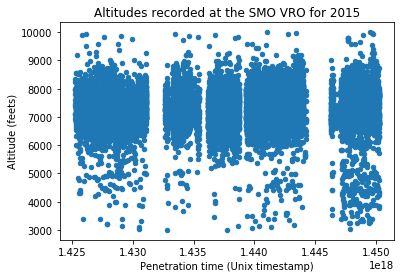

In [0]:
#x/y : int or str

import pandas as pd
df = pd.read_csv('SMO-VOR-2015.csv')

df.dtypes
type(df.ptime)
df['unix_tsp'] = pd.to_datetime(df.ptime).astype(int)

df.plot.scatter(x='unix_tsp', y='alt')
plt.xlabel('Penetration time (Unix timestamp)')
plt.ylabel('Altitude (feets)')
plt.title('Altitudes recorded at the SMO VRO for 2015')
#plt.show()


# 😖 Exercise 3: 

In a new Colab notebook load `SMO-VOR-2015` and use matplotlib to create a bar chart of  the altitudes of altitude (variable `alt` ) counts for the months (variable `month`) .

Assuming you load the data in a dataframe `df` use the following dataframe of sorted counts per months:

```
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df.month = pd.Categorical(df.month, categories=months, ordered=True)
df = df.groupby(['month']).size().reset_index(name='counts')
```

   month  counts
0    Jan       0
1    Feb       0
2    Mar    2689
3    Apr    1985
4    May     949
5    Jun    1991
6    Jul    2141
7    Aug    2473
8    Sep    3433
9    Oct     564
10   Nov    3058
11   Dec    2274


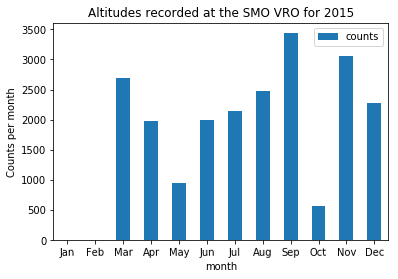

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('SMO-VOR-2015.csv')

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df.month = pd.Categorical(df.month, categories=months, ordered=True)
df = df.groupby(['month']).size().reset_index(name='counts')
df.head()

print(df)

df.plot.bar(x='month', y='counts', rot=1)
plt.ylabel('Counts per month')
plt.title('Altitudes recorded at the SMO VRO for 2015')

plt.show()

# 🤔 Exercise 4: 

In a new Colab notebook load `TSLA.csv` and use matplotlib to create a linechart of  `Close` over time.

You will need to change `Date` to a datetime object:

```
df.Date = pd.to_datetime(df.Date)
```

and use the `plt.plot` command.


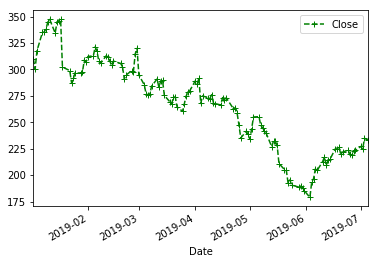

In [0]:
import pandas as pd
df = pd.read_csv('TSLA.csv')
df.Date = pd.to_datetime(df.Date)
df.plot.line(x='Date', y='Close', marker='+', color='g', linestyle='--')